In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [79]:
dataset = pd.read_csv('/content/insurance.csv')


In [12]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


###AGE


In [27]:
dataset['age'].describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


<Axes: ylabel='Frequency'>

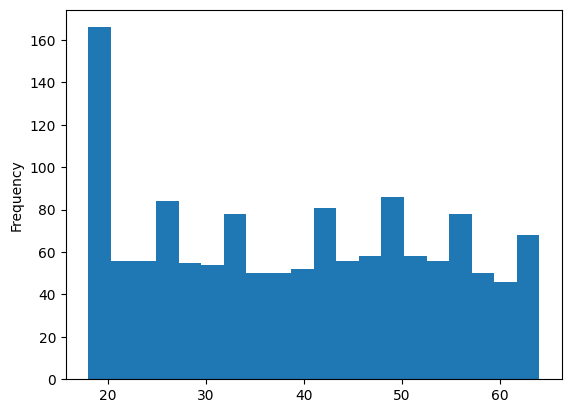

In [29]:
dataset['age'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

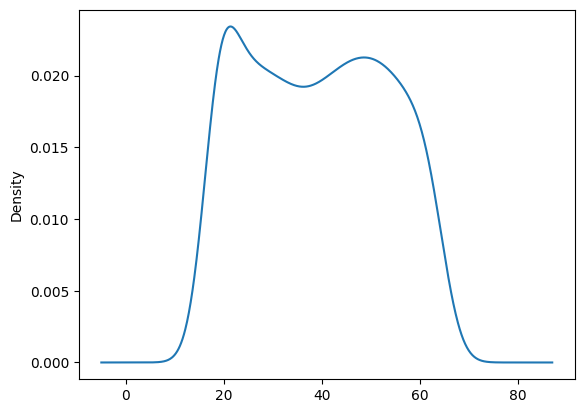

In [31]:
dataset['age'].plot(kind='kde')

In [32]:
dataset['age'].skew()

np.float64(0.05567251565299186)

<Axes: >

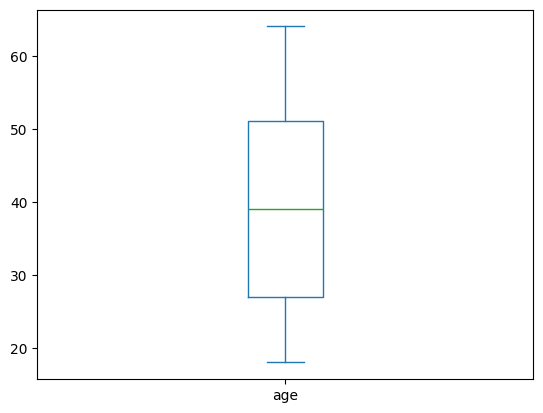

In [34]:
dataset['age'].plot(kind='box')

###BMI

In [35]:
dataset['bmi'].describe()

,bmi
count,1338.000000
mean,30.665471
std,6.098382
min,16.000000
25%,26.300000
50%,30.400000
75%,34.700000
max,53.100000


<Axes: ylabel='Frequency'>

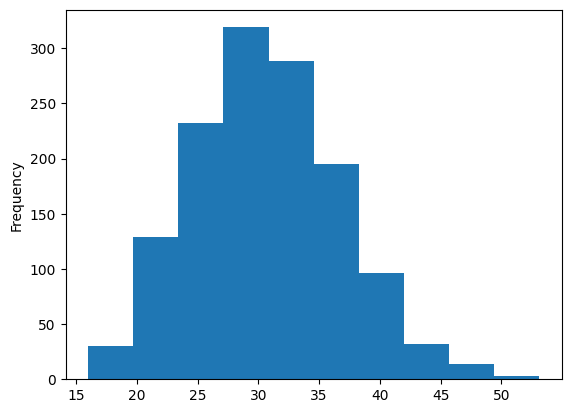

In [36]:
dataset['bmi'].plot(kind='hist')

<Axes: ylabel='Density'>

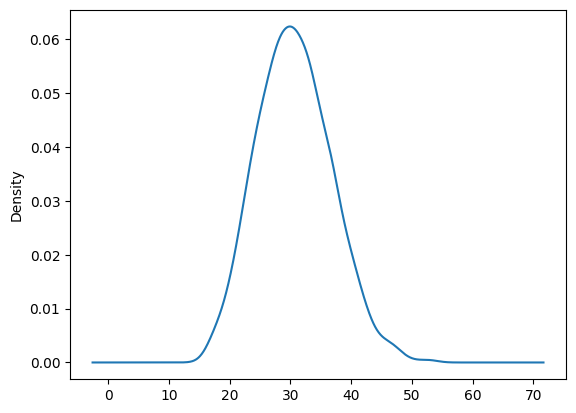

In [37]:
dataset['bmi'].plot(kind='kde')

In [38]:
dataset['bmi'].skew()

np.float64(0.28459296016731195)

<Axes: >

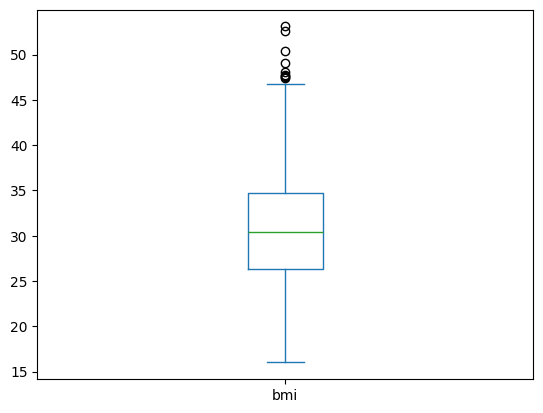

In [39]:
dataset['bmi'].plot(kind='box')

In [44]:
Q1 = dataset['bmi'].quantile(0.25)
Q3 = dataset['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = dataset[(dataset['bmi'] < lower_bound) | (dataset['bmi'] > upper_bound)]

print(outliers)


      age     sex   bmi  children smoker     region  expenses
116    58    male  49.1         0     no  southeast  11381.33
286    46  female  48.1         2     no  northeast   9432.93
401    47    male  47.5         1     no  southeast   8083.92
543    54  female  47.4         0    yes  southeast  63770.43
847    23    male  50.4         1     no  southeast   2438.06
860    37  female  47.6         2    yes  southwest  46113.51
1047   22    male  52.6         1    yes  southeast  44501.40
1088   52    male  47.7         1     no  southeast   9748.91
1317   18    male  53.1         0     no  southeast   1163.46


###Children

In [45]:
dataset['children'].describe()

,children
count,1338.000000
mean,1.094918
std,1.205493
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,5.000000


<Axes: >

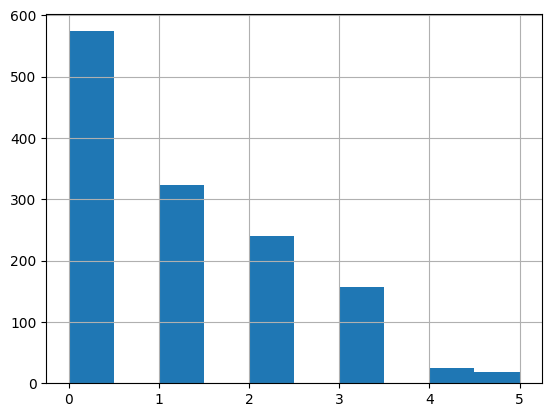

In [46]:
dataset['children'].hist()

<Axes: ylabel='Density'>

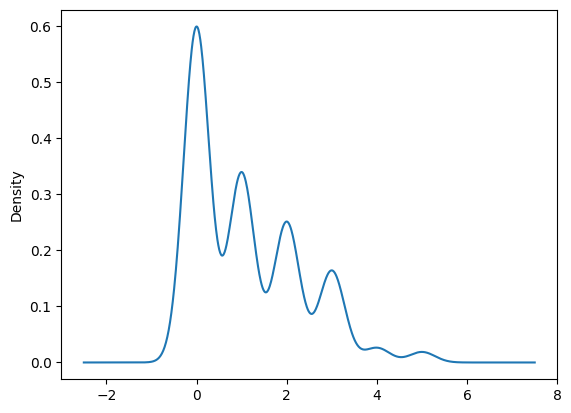

In [48]:
dataset['children'].plot(kind='kde')

<Axes: >

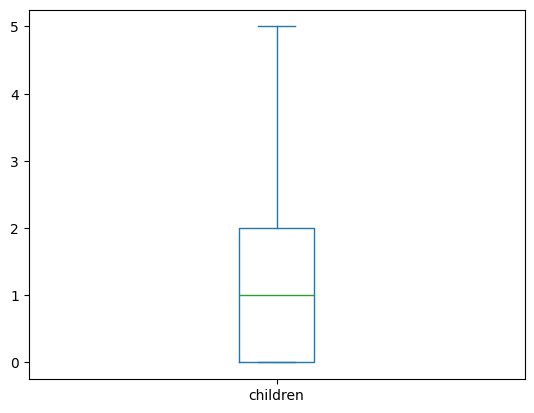

In [49]:
dataset['children'].plot(kind='box')

###Sex

In [50]:
dataset['sex'].value_counts()

,count
sex,
male,676
female,662


<Axes: xlabel='sex'>

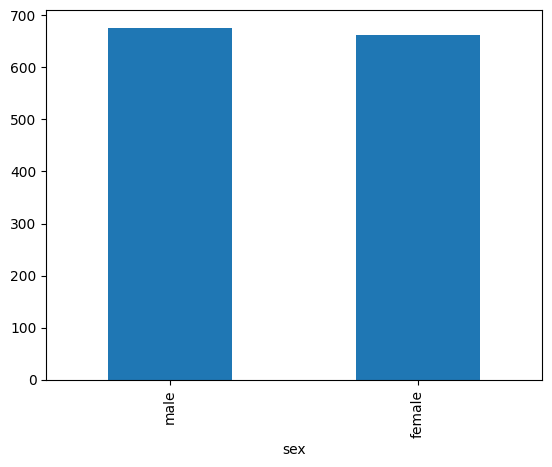

In [51]:
dataset['sex'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

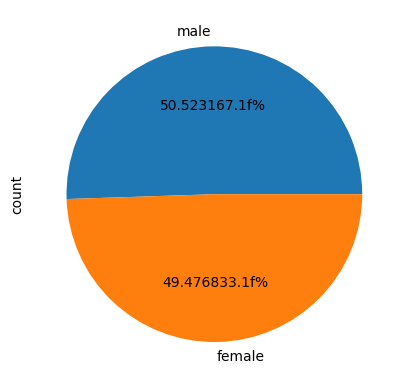

In [52]:
dataset['sex'].value_counts().plot(kind='pie', autopct = '%f.1f%%')

###Smoker

In [53]:
dataset['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


<Axes: xlabel='smoker'>

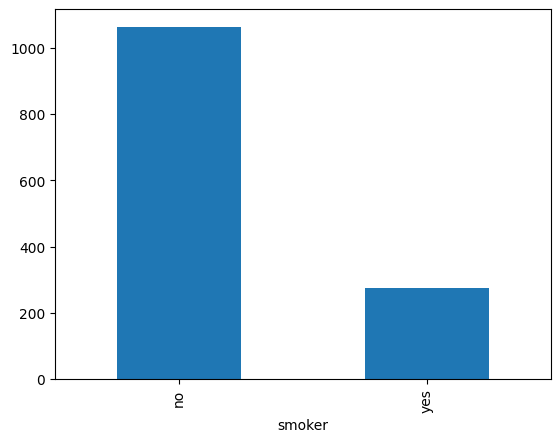

In [54]:
dataset['smoker'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

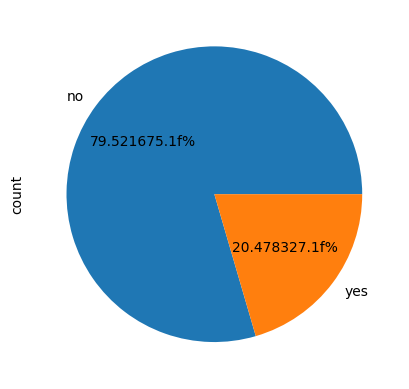

In [55]:
dataset['smoker'].value_counts().plot(kind='pie', autopct = '%f.1f%%')

###Region

In [56]:
dataset['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


<Axes: xlabel='region'>

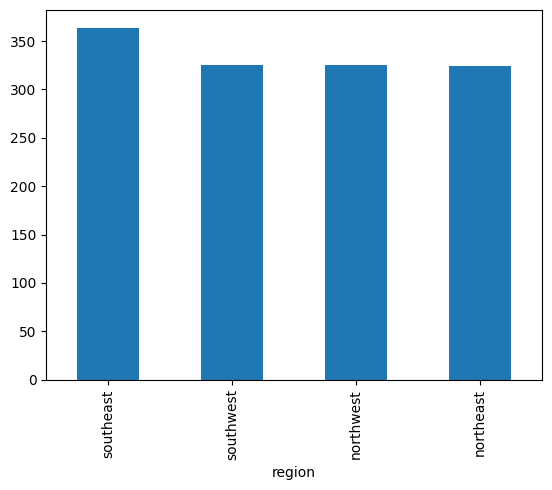

In [57]:
dataset['region'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

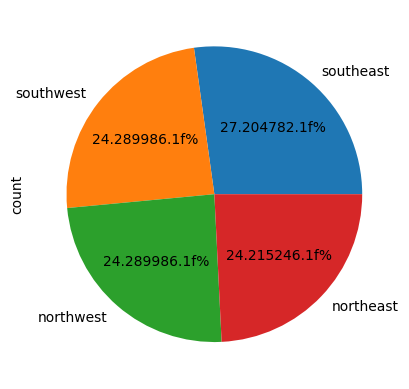

In [58]:
dataset['region'].value_counts().plot(kind='pie', autopct = '%f.1f%%')

###Age-Expenses

<function matplotlib.pyplot.show(close=None, block=None)>

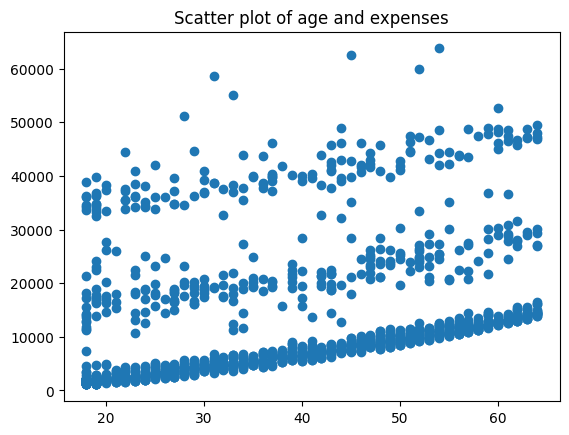

In [59]:
plt.scatter(x = dataset['age'], y = dataset['expenses'])
plt.title('Scatter plot of age and expenses')
plt.show

###BMI-Expenses

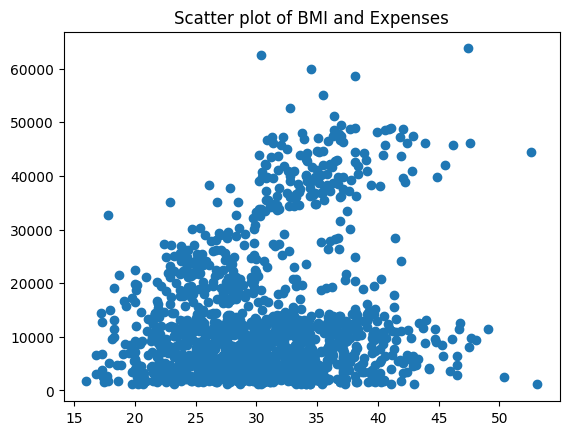

In [60]:
plt.scatter(x = dataset['bmi'], y = dataset['expenses'])
plt.title('Scatter plot of BMI and Expenses')
plt.show()

###Children-Expenses

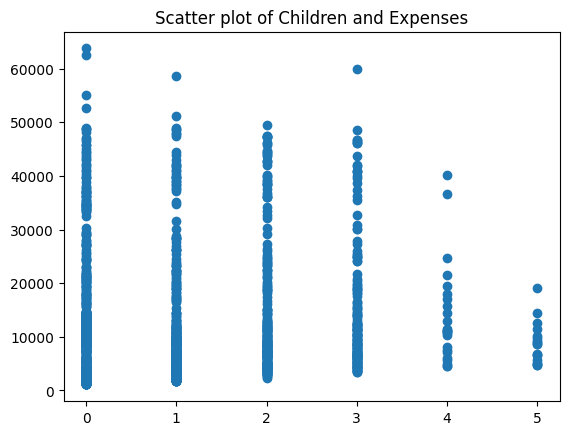

In [61]:
plt.scatter(x = 'children', y = 'expenses', data = dataset)
plt.title('Scatter plot of Children and Expenses')
plt.show()

###Sex-Expenses

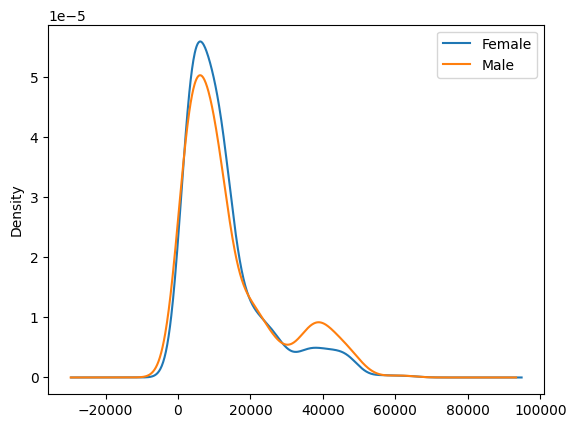

In [81]:
dataset[dataset['sex']=='female']['expenses'].plot(kind = 'kde', label = 'Female')
dataset[dataset['sex']=='male']['expenses'].plot(kind = 'kde', label = 'Male')
plt.legend()
plt.show()

###Smoker-Expenses

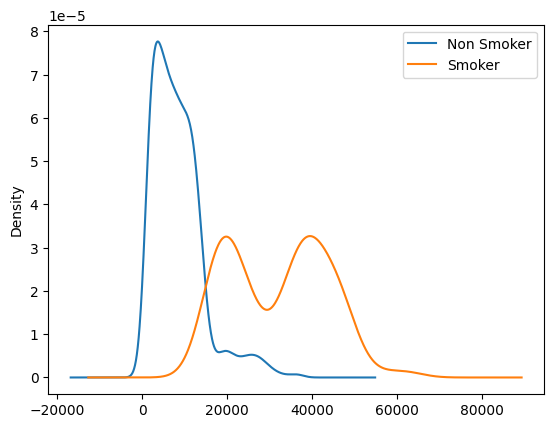

In [83]:
dataset[dataset['smoker']=='no']['expenses'].plot(kind = 'kde', label = 'Non Smoker')
dataset[dataset['smoker']=='yes']['expenses'].plot(kind = 'kde', label = 'Smoker')
plt.legend()
plt.show()

###Region-Expenses

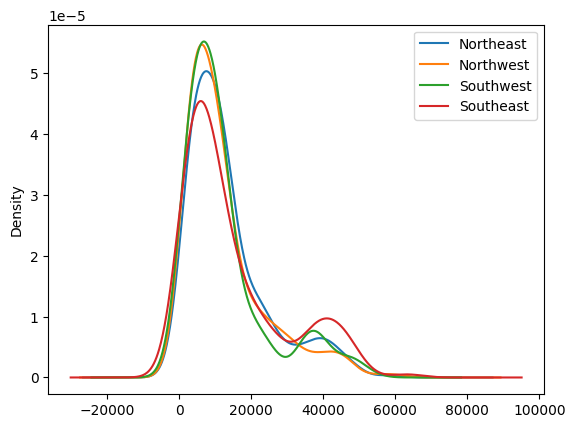

In [84]:
dataset[dataset['region']=='northeast']['expenses'].plot(kind = 'kde', label = 'Northeast')
dataset[dataset['region']=='northwest']['expenses'].plot(kind = 'kde', label = 'Northwest')
dataset[dataset['region']=='southwest']['expenses'].plot(kind = 'kde', label = 'Southwest')
dataset[dataset['region']=='southeast']['expenses'].plot(kind = 'kde', label = 'Southeast')
plt.legend()
plt.show()


###Correlation

<Axes: >

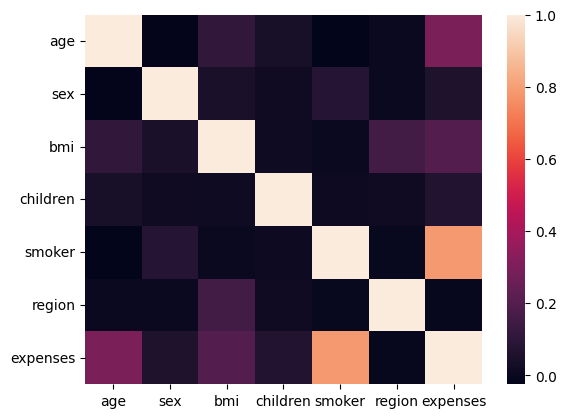

In [77]:
sns.heatmap(dataset.corr())

###Pairplot

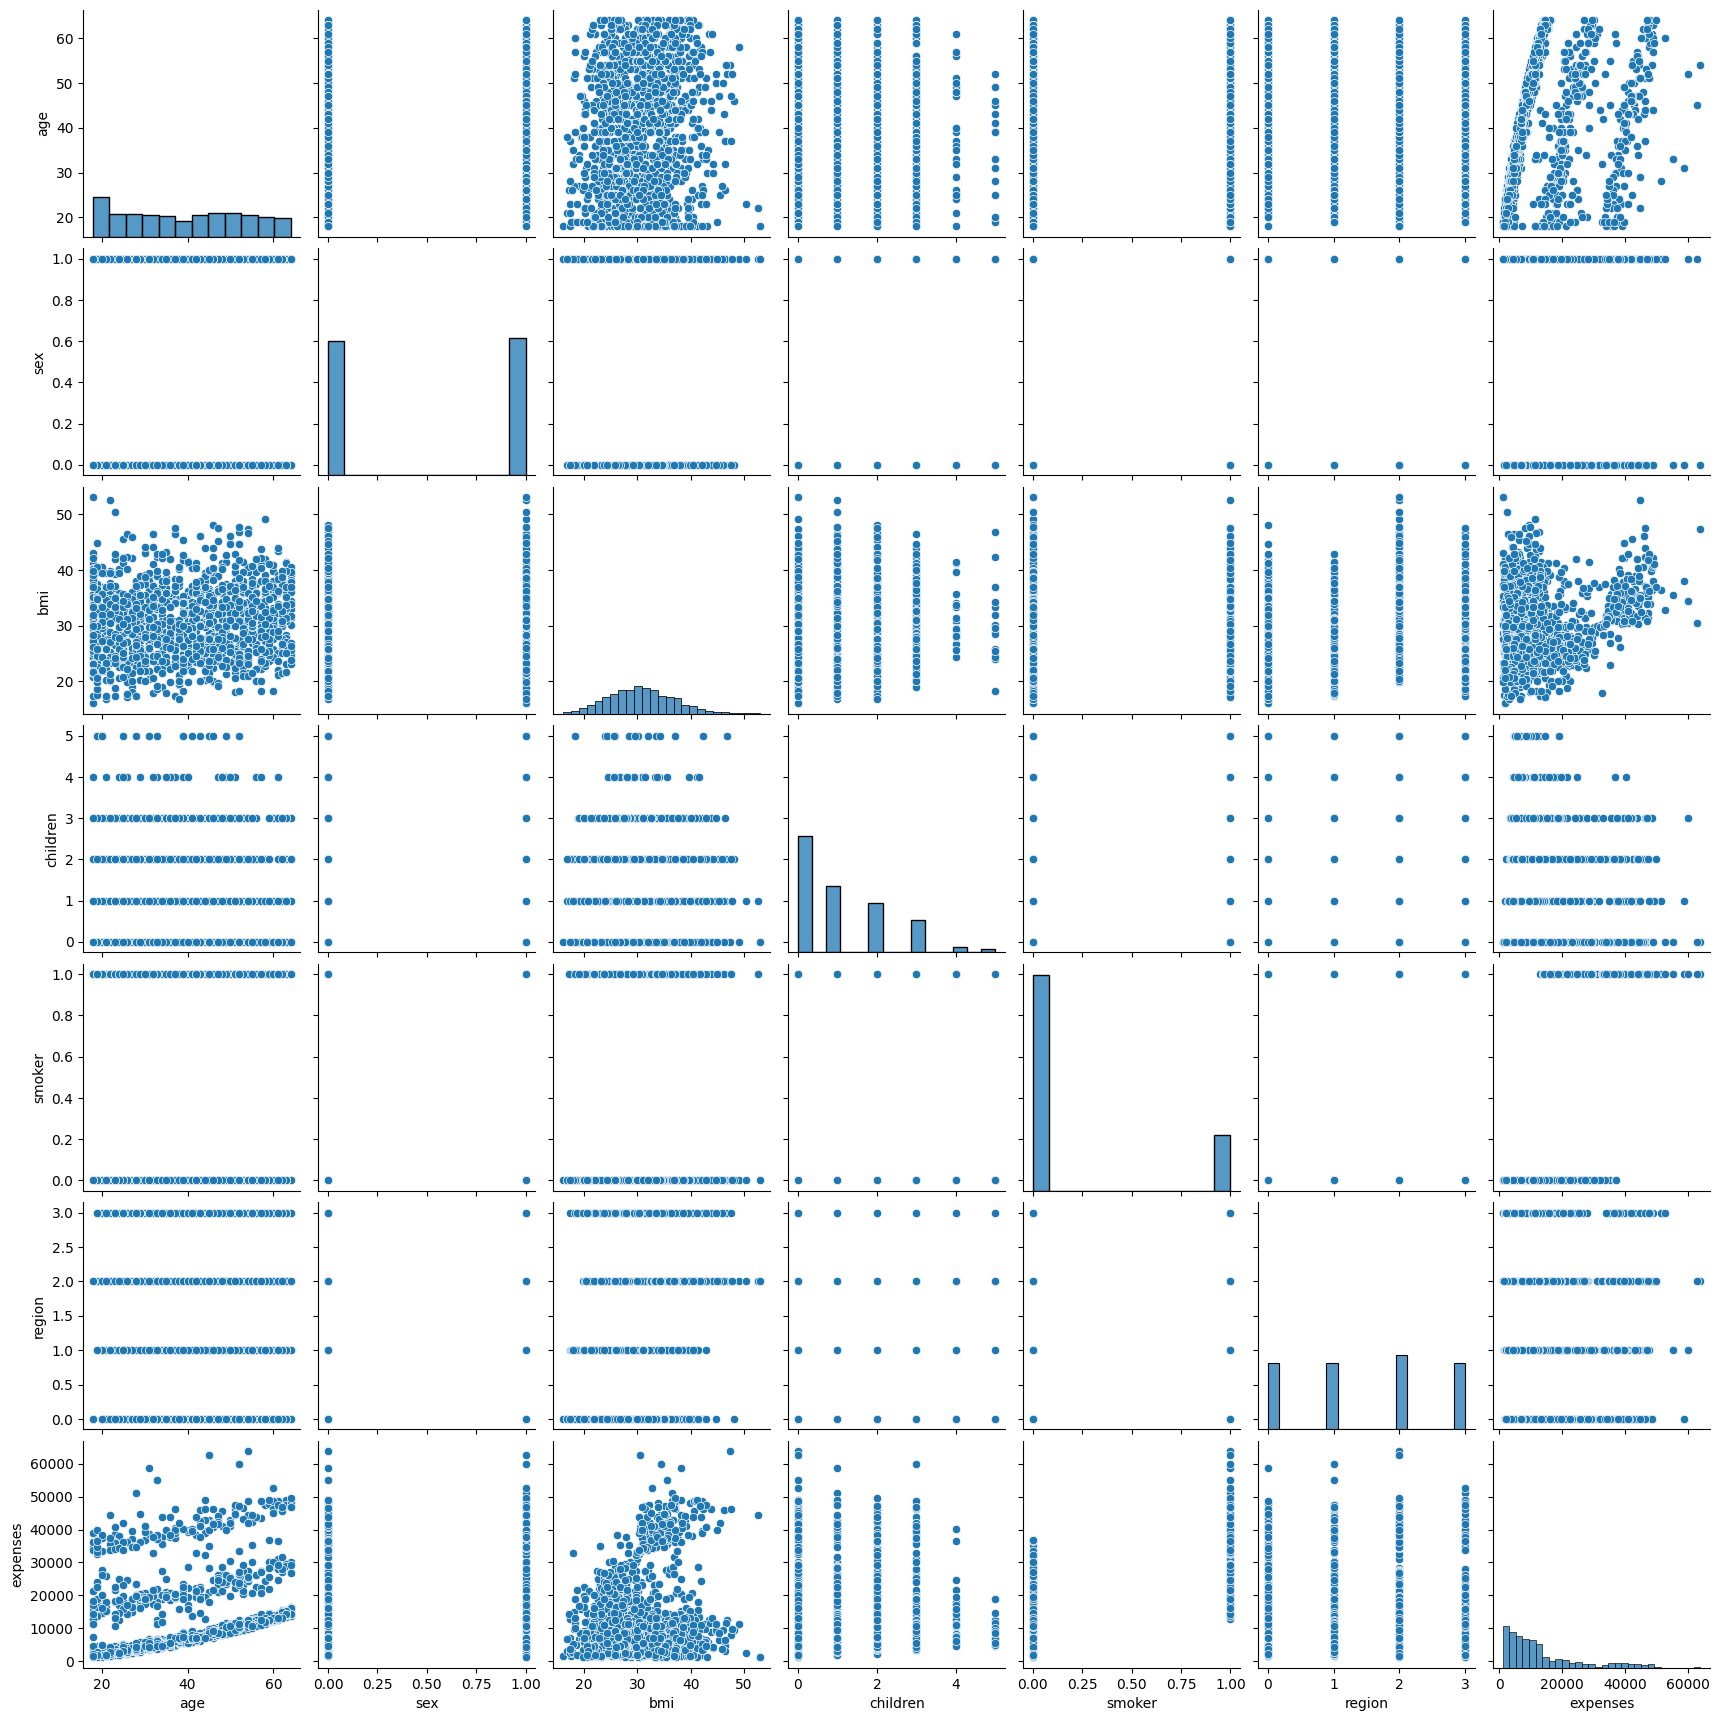

In [78]:
sns.pairplot(dataset)

###One-Hot Encoding

In [15]:
df_encoded = pd.get_dummies(dataset, columns = ['sex','smoker', 'region'])

In [16]:
df_encoded.head()

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,True,False,False,True,False,False,False,True
1,18,33.8,1,1725.55,False,True,True,False,False,False,True,False
2,28,33.0,3,4449.46,False,True,True,False,False,False,True,False
3,33,22.7,0,21984.47,False,True,True,False,False,True,False,False
4,32,28.9,0,3866.86,False,True,True,False,False,True,False,False


In [22]:
x = df_encoded.drop(columns = ['expenses'])
y = df_encoded['expenses']

In [23]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    x, y, random_state=42, test_size=0.2
)

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain,ytrain)
lr.score(xtest, ytest)

0.7835726930039905

In [89]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


models = [RandomForestRegressor(), DecisionTreeRegressor(), LinearRegression()]
errors = {}

for model in models:
  model.fit(xtrain, ytrain)
  name = type(model).__name__
  score = model.score(xtest, ytest)*100
  errors[name] = score

In [90]:
errors

{'RandomForestRegressor': 86.02324712714433,
 'DecisionTreeRegressor': 75.23258389801678,
 'LinearRegression': 78.35726930039904}

<BarContainer object of 3 artists>

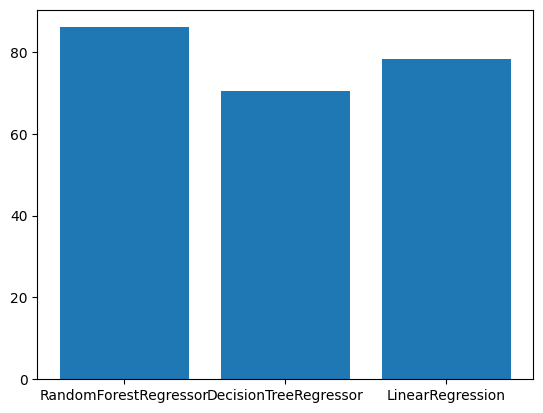

In [93]:
import matplotlib.pyplot as plt

plt.bar(errors.keys(),errors.values())
